## 볼린저 밴드 투자 전략
1. 이동 평균선 생성 : 데이터의 20개의 평균 값
2. 상단 밴드 생성 : 이동 평균선 + (2 * 20개의 데이터의 표준편차)
3. 하단 밴드 생성 : 이동 평균선 - (2 * 20개의 데이터의 표준편차)
4. 가격이 하단 밴드보다 낮은 경우 매수
5. 가격이 상단 밴드보다 높은 경우 매도

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

C:\Users\User\AppData\Local\Temp\ipykernel_19444\785167135.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('../../../csv/AAPL.csv', index_col='Date')
df.head(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0


In [4]:
# 결측치, 무한대 데이터를 제거
flag = df.isin([np.nan, np.inf, -np.inf]). any(axis=1)

In [5]:
df = df.loc[~flag, ['Adj Close']]

In [6]:
## 이동 평균선 생성
## 데이터들을 20개 모아서 평균
df.iloc[0:20, 0].mean()

0.4432777

In [7]:
## 이동평균선 컬럼을 생성
## 값들은 결측치로 대입
df['center'] = np.nan

In [8]:
df.head(3)

,Adj Close,center
Date,,
1980-12-12,0.410525,NaN
1980-12-15,0.389106,NaN
1980-12-16,0.360548,NaN


In [9]:
for i in range(20,len(df)+1):
    mean_data = df.iloc[i-20:i,0].mean()
    df.iloc[i-1, 1] = mean_data # i = 20이니까, -1을 해준거고 두번째 컬럼 = 1 

In [10]:
df.iloc[18:23, ]

,Adj Close,center
Date,,
1981-01-09,0.455147,NaN
1981-01-12,0.451577,0.443278
1981-01-13,0.435513,0.444527
1981-01-14,0.437298,0.446937
1981-01-15,0.446223,0.451220


In [11]:
# 위 방법말고 그룹 연산을 해서 계산하는 방식이 있음.
# rolling(n) : n만큼 데이터의 개수를 그룹
df['center2'] = df['Adj Close'].rolling(20).mean()

In [12]:
df.iloc[18:24]

,Adj Close,center,center2
Date,,,
1981-01-09,0.455147,NaN,NaN
1981-01-12,0.451577,0.443278,0.443278
1981-01-13,0.435513,0.444527,0.444527
1981-01-14,0.437298,0.446937,0.446937
1981-01-15,0.446223,0.451220,0.451220
1981-01-16,0.442653,0.454879,0.454879


In [13]:
# 상단 밴드, 하단 밴드 생성
# 상단 밴드 = 이동 평균선 + (2 * 20개 데이터의 표준편차 )
df['ub'] = df['center'] + (2 * df['Adj Close'].rolling(20).std())

# 하단 밴드 = 이동 평균선 - (2 * 20개의 데이터의 표준편차)
df['lb'] = df['center'] - (2 * df['Adj Close'].rolling(20).std())

In [14]:
df.iloc[18:23, ]

,Adj Close,center,center2,ub,lb
Date,,,,,
1981-01-09,0.455147,NaN,NaN,NaN,NaN
1981-01-12,0.451577,0.443278,0.443278,0.536950,0.349605
1981-01-13,0.435513,0.444527,0.444527,0.537019,0.352035
1981-01-14,0.437298,0.446937,0.446937,0.535789,0.358084
1981-01-15,0.446223,0.451220,0.451220,0.530255,0.372186


In [15]:
# index를 시계열로 변경
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')

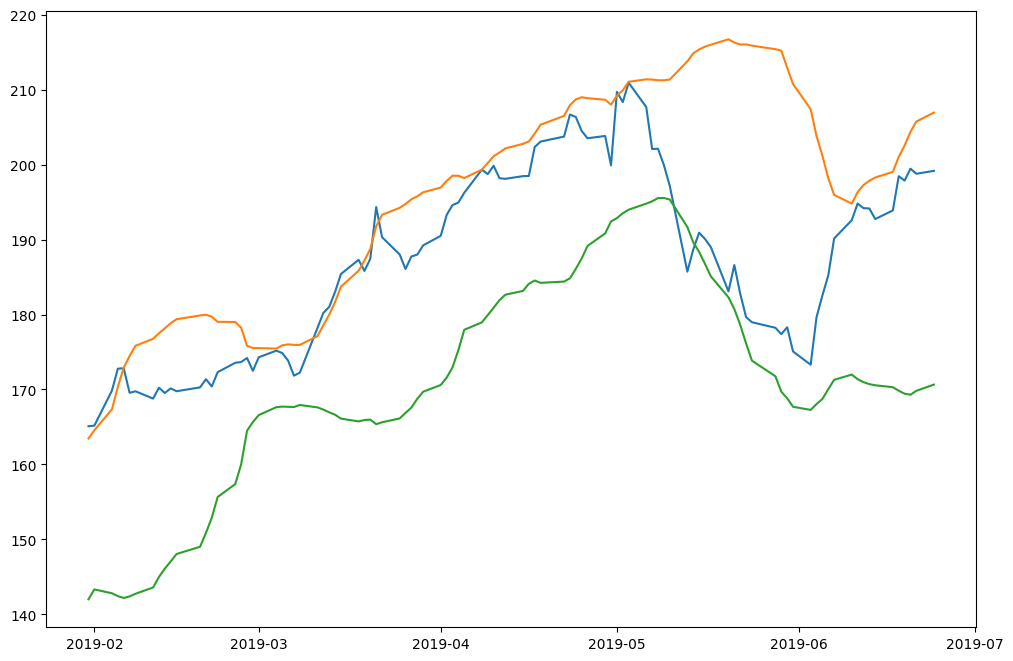

In [16]:
x = df.tail(100).index
price_y = df.tail(100)['Adj Close']
ub_y = df.tail(100)['ub']
lb_y = df.tail(100)['lb']

plt.figure(figsize=(12, 8))
plt.plot(x, price_y)
plt.plot(x, ub_y)
plt.plot(x, lb_y)
plt.show()

<Axes: xlabel='Date'>

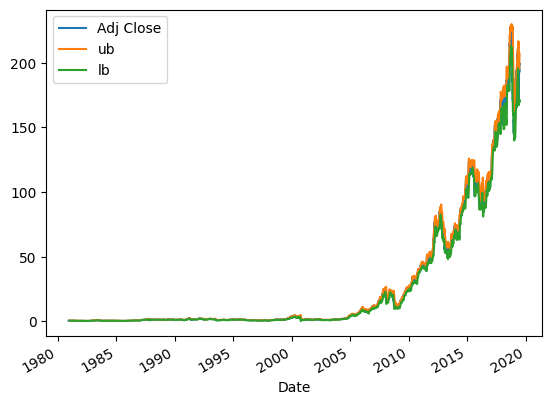

In [17]:
df[['Adj Close', 'ub', 'lb']].plot()

In [18]:
# 투자 기간 선택
start = '2010-01-01'

In [19]:
# start는 시계열로 변경
start = datetime.strptime(start, '%Y-%m-%d')

In [2]:
test_df = df.loc[start: , ]

NameError: name 'df' is not defined

In [21]:
test_df.tail()

,Adj Close,center,center2,ub,lb
Date,,,,,
2019-06-18,198.449997,185.4325,185.4325,201.032574,169.832427
2019-06-19,197.869995,185.9960,185.9960,202.558154,169.433846
2019-06-20,199.460007,186.8300,186.8300,204.361771,169.298229
2019-06-21,198.779999,187.7860,187.7860,205.751400,169.820600
2019-06-24,199.169998,188.7960,188.7960,206.944862,170.647138


In [11]:
test_df['trade'] = ""

NameError: name 'test_df' is not defined

## 보유 내역 추가
- 조건식
    - 상단밴드보다 수정 주가가 높거나 같은 경우
        - 현재 보유상태라면
            - 매도 (trade = "")
        - 보유 상태가 아니라면
            - 유지 (trade = "')
    - 상단밴드보다 낮고 하단밴드보다 높은 경우
        - 현재 보유 상태 
            - 유지 (trade = "buy")
        - 보유 상태가 아니라면
            - 유지 (trade = "")
    - 하단밴드보다 낮거나 같은 경우
        - 현재 보유 상태라면
            - 유지 (trade = "buy")
        - 보유 상태가 아니라면
            - 매수 (trade = "buy")

    

In [3]:
for i in test_df.index:
    # i가 의미하는것은?  test_df의 index 값
    # print(i)
    # 수정 주가가 상단밴드보다 높거나 같은 경우
    if test_df.loc[i,'Adj Close'] >= test_df.loc[i,'ub']:
        # 현재 보유중이라면 -> trade를 buy로 변경
        # 전날의 trade가 buy라면
        if test_df.shift().loc[i,'trade'] == 'buy':
            test_df.loc[i,'trade'] = ""
        # 보유중이 아니라면
        else:
            test_df.loc[i,'trade'] = ""
    # 한단밴드보다 수정 주가가 낮거나 같은 경우
    elif test_df.loc[i,'Adj Close'] <= test_df.loc[i,'lb']:
        #현재 보유중이라면 -> trade를 "buy"로 변경
        if test_df.shift().loc[i,'trade'] == 'buy':
            test_df.loc[i,'trade'] = 'buy'
        #현재 보유중이 아니라면 -> 매수
        else :
            test_df.loc[i,'trade'] = 'buy'
    # 수정 주가가 밴드 사이에 있을떄
    else :
        #현재 보유 상태라면 -> 유지 trade를 "buy"
        if test_df.shift().loc[i,'trade'] == 'buy':
            test_df.loc[i,'trade'] = 'buy'
        #보유 상태가 아니라면 -> 유지 trade를 ""
        else:
            test_df.loc[i,'trade'] = ""

NameError: name 'test_df' is not defined

In [5]:
test_df['trade'].value_counts()

NameError: name 'test_df' is not defined

## 수익율 계산
- 구매한 날의 수정 주가
    - 전날의 trade = "" 오늘의 trade = "buy"인 날의 수정 주가 
- 판매한 날의 수정 주가
    - 전날의 trade = "buy" 오늘의 trade = ""인 날의 수정 주가
- 수익율
    - 판매한 날의 수정주가/구매한 날의 수정주가

In [6]:
# 수익률 파생 변수를 생성
test_df['rtn'] = 1

NameError: name 'test_df' is not defined

In [ ]:
acc_rtn = 1
for i in test_df.index:
    # 구매가 생성
    if (test_df.shift().loc[i,'trade'] == "") & (test_df.loc[i,'trade'] == 'buy'):
        buy = test_df.loc[i,'Adj Close']
        print(f"매수일: {i}, 매수가: {buy}")
    #팬매가 생성
    elif (test_df.shift().loc[i,'trade'] == 'buy') & (test_df.loc[i,'trade'] == ''):
        sell = test_df.loc[i,'Adj Close']
        #수익을 계산
        rtn = sell/buy
        #계싼 된 수익율을 test_df에 rtn 컬럼에 대입
        test_df.loc[i,'rtn'] = rtn
        acc_rtn *= rtn
        print(f"매도일: {i}, 매도가: {sell}, 수익율: {rtn},누적 수익율: {acc_rtn}")
        

In [ ]:
acc_rtn

In [ ]:
test_df['acc_rtn'] = test_df['rtn'].cumprod()

In [7]:
test_df.iloc[-1,]['acc_rtn']

NameError: name 'test_df' is not defined

### 볼린저 밴드의 함수화
1. 밴드를 생성하는 함수
    - 매개변수 4개 (데이터프레임, 기준되는 컬럼명, 시작시간, 종료시간, 데이터의 개수)
    - 기준이 되는 컬럼은 기본값을 Adj Close
    - 시작시간은 기본값 2010-01-01
    - 종료시간은 기본값 ""
    - 데이터의 개수는 기본값은 20
    - 인덱스가 Date인지 확인하여 아니라면 Date를 인덱스로 변경
    - 인덱스를 시계열 데이터로 변경
    - 시작시간, 종료시간을 시계열 데이터로 변경
    - 결측치, 무한대 값을 제외
    - 기준이 되는 컬럼을 제외하고 모두 삭제
    - 이동 평균선, 상단밴드, 하단밴드 생성
    - 시작시간, 종료시간으로 데이터 필터
    - 위의 과정에서 나온 데이터프레임을 리턴

In [8]:
def create_band(
    _df,
    _col = 'Adj Close',
    _start = "2010-01-01",
    _end = datetime.now(),
    _cnt = 20):

     #복사본 생성
    df = _df.copy()
    # 인덱스가 Date 인가?
    if 'Date' in df.columns:
        df.set_index('Date', inplace=True)

    # index를 시계열 데이터로 변경
    df.index = pd.to_datetime(df.index, format='%Y-%m-%d')

    # 시작시간과 종료 시간은 시계열로 변경
    try:
            start = datetime.strptime(_start, '%Y-%m-%d')
            if type(_end) == "str":
                end = datetime.strptime(_end, '%Y-%m-%d')
            else:
                end = _end
    except:
            return "인자갑의 타입이 잘못되었습니다.(예 : YYYY-mm-dd)"
    
    # 결측치와 무한대 값을 제외
    flag = df.isin([np.nan, np.inf, np.inf]).any(axis=1)
    df = df.loc[~flag, ]

    # 기준이 되는 컬럼을 제외하고 모두 삭제
    result = df[[_col]]

    # 이동 평균선, 상단밴드, 하단밴드 생성
    result ['center'] = result[_col].rolling(_cnt).mean()
    result['ub'] = result['center'] + (2 * result[_col].rolling(_cnt).std())
    result['lb'] = result['center'] - (2 * result[_col].rolling(_cnt).std())

    # 시작 시간과 종료시간으로 필터링
    result = result.loc[start:end, ]

    return result
    

In [5]:
df = pd.read_csv("../../../csv/AMZN.csv")

In [9]:
band_df = create_band(df)

C:\Users\User\AppData\Local\Temp\ipykernel_19444\2850345257.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result ['center'] = result[_col].rolling(_cnt).mean()
C:\Users\User\AppData\Local\Temp\ipykernel_19444\2850345257.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['ub'] = result['center'] + (2 * result[_col].rolling(_cnt).std())
C:\Users\User\AppData\Local\Temp\ipykernel_19444\2850345257.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [14]:
band_df.head()

,Adj Close,center,ub,lb
Date,,,,
2010-01-04,133.899994,133.984001,141.460445,126.507556
2010-01-05,134.690002,133.839500,141.132776,126.546225
2010-01-06,132.250000,133.741500,141.066419,126.416581
2010-01-07,130.000000,133.536000,141.045671,126.026329
2010-01-08,133.520004,133.646500,141.082939,126.210062


- 트레이드 컬럼을 생성하는 함수
    - 매개변수 1개 -> 1번 함수에서 생성된 데이터프레임 인자 값으로 받아온다.
    - trade 컬럼을 생성하여 값들은 ""대입
    - 밴드들을 이용하여 보유 상태를 대입
    - 결과값을 리턴
    

In [15]:
def create_trade(_df):
    # 기준이 되는 컬럼의 이름을 변수에 저장
    col = _df.columns[0]

    df = _df.copy()

    # 거래 내역이라는 컬럼을 생성
    df['trade'] = ""

    # 거래 내역 추가
    for i in df.index:
        # 상단밴드보다 기준이 되는 컬럼의 값이 높거나 같은 경우
        if df.loc[i, col] >= df.loc[i, 'ub']:
            df.loc[i, 'trade'] = ""
        # 하단밴드보다 col의 값이 작거나 같은 경우
        elif df.loc[i, col] <= df.loc[i, 'lb']:
            df.loc[i, 'trade'] = "buy"
        # 밴드 사이에 col의 값이 존재한다면
        else: 
            df.loc[i, 'trade'] = df.shift().loc[i, 'trade']
    return df


In [16]:
trade_df = create_trade(band_df)

In [17]:
trade_df['trade'].value_counts()

trade
       1483
buy     863
Name: count, dtype: int64

- 수익률을 계산하는 함수
    - 매개변수 1개 -> 2번 함수에서 나온 결과를 인자값으로 받아온다.
    - 수익률('rtn') 컬럼을 생성하여 데이터는 1 대입
    - 구매한 날의 데이터와 판매한 날의 데이터를 기준으로 수익률을 계산하여 rtn에 대입
    - 누적수익률('acc_rtn') 컬럼을 생성하여 수익률의 누적곱을 대입
    - 결과는 데이터프레임과 총 누적수익률을 리턴

In [1]:
def create_rtn(_df):
    # 기준이 되는 컬럼을 변수에 저장
    col = _df.columns[0]
    # 복사본 생성
    df = _df.copy()
    # 수익률 파생변수 생성
    df['rtn'] = 1

    # 수익률 계산하는 반복문
    for i in df.index:
        # 구매한 날
        if (df.shift().loc[i, 'trade'] == '') & (df.loc[i, 'trade'] == 'buy'):
            buy = df.loc[i, col]
            print(f"매수 일 : {i}, 매수가 : {buy}")
        # 판매한 날
        elif (df.shift().loc[i, 'trade'] == 'buy') & (df.loc[i, 'trade'] == ""):
            sell = df.loc[i, col]
            rtn = sell / buy
            print(f"매도 일 : {i}, 매도가 : {sell}, 수익률 : {rtn}")
            df.loc[i, 'rtn'] = rtn
    # 누적 수익률 계산
    df['acc_rtn'] = df['rtn'].cumprod()
    acc_rtn = df.iloc[-1, ]['acc_rtn']
    return df, acc_rtn